Data Manipulation

1. Pandas is imported to sort, clean, fromat the data and into a systematic and working DataFrame.
2.  From Matplotlib Library, matplotlib.pyplot module and Seaborn are imported to Visualize the Data.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cleaning and Sorting of Data.

Reading the raw data files

In [27]:
anime_all = pd.read_csv('anime.csv')
rating_all = pd.read_csv('rating.csv')

Gathering information about the dataset

In [28]:
anime_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [29]:
rating_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [30]:
anime_all.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Replace all the rating from -1 to 0 because '-1' refers to user has not watched the anime yet.

In [31]:
rating_all['rating'] = rating_all['rating'].replace(-1, 0)
rating_all['rating'].value_counts()

8     1646019
0     1476496
7     1375287
9     1254096
10     955715
6      637775
5      282806
4      104291
3       41453
2       23150
1       16649
Name: rating, dtype: int64

Merging both the datasets into a single datset for further cleaning and analysis.

In [32]:
merged_all = pd.merge(anime_all, rating_all, on='anime_id')
merged_all.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,0


Sorting the values according to the columns anime_id and the rating of the anime provided by the users.

In [33]:
sorted_all = merged_all.sort_values(by=['anime_id', 'rating_y'])
sorted_all.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
198202,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,13,0
198212,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,54,0
198234,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,218,0
198236,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,221,0
198244,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,259,0


Removing the records of users that have not yet watched the anime.

In [34]:
sorted_all_actual = sorted_all[sorted_all['rating_y'] != 0].copy()

In [35]:
sorted_all_actual.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
198505,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,1718,1
200096,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,8046,1
203093,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,23715,1
203233,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,24323,1
206293,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,40189,1


Finally reducing the row data from having different user_id to the number of users i.e. count of user_ids and calculating the mean of all the ratings provided by the users.

In [36]:
grouped_data = sorted_all_actual.groupby('anime_id')
counts = grouped_data['user_id'].transform('count')
means = grouped_data['rating_y'].transform('mean')

final_sorted_all_actual = sorted_all_actual.copy()
final_sorted_all_actual[['user_id', 'rating_y']] = pd.DataFrame({'user_id': counts, 'rating_y': means})

final_sorted_all_actual.drop_duplicates(subset=['anime_id'], inplace=True)
final_sorted_all_actual.rename(columns={'user_id': 'users'}, inplace=True)

In [37]:

final_sorted_all_actual.shape

(9926, 9)

Splitting the Genre into Binary Values of different columns to depict data more accurately and will later help in training the model properly.

In [38]:
final_sorted_all_actual = final_sorted_all_actual.join(final_sorted_all_actual['genre'].str.get_dummies(','))
final_sorted_all_actual = final_sorted_all_actual.drop(columns=['genre'])
final_sorted_all_actual.head()

,anime_id,name,type,episodes,rating_x,members,users,rating_y,Adventure,Cars,...,Seinen,Shoujo,Shounen,Slice of Life,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
198505,1,Cowboy Bebop,TV,26,8.82,486824,13449,8.869433,1,0,...,0,0,0,0,0,0,0,0,0,0
979683,5,Cowboy Bebop: Tengoku no Tobira,Movie,1,8.40,137636,5790,8.439724,0,0,...,0,0,0,0,0,0,0,0,0,0
1314567,6,Trigun,TV,26,8.32,283069,9385,8.419393,0,0,...,0,0,0,0,0,0,0,0,0,0
5473479,7,Witch Hunter Robin,TV,26,7.36,64905,2169,7.533426,0,0,...,0,0,0,0,0,0,0,0,0,0
6448762,8,Beet the Vandel Buster,TV,52,7.06,9848,308,7.198052,0,0,...,0,0,0,0,0,0,0,0,0,0


Analyzing the dataset based on the 'type' column of the dataset.

In [39]:
print(final_sorted_all_actual['type'].value_counts())
print('...'*20)
print('Size of Final Dataset')
print(final_sorted_all_actual.shape)

TV         3069
OVA        2730
Movie      1755
Special    1448
ONA         478
Music       445
Name: type, dtype: int64
............................................................
Size of Final Dataset
(9926, 89)


Grouping the data based on the type column.

In [40]:
groups = final_sorted_all_actual.groupby('type')

DATA PREPARATION OF ALL THE ANIME RECORDS

In [41]:
# anime = pd.read_csv('Grouped by Type/TV.csv')
anime = final_sorted_all_actual
anime = anime.loc[:, (anime != 0).any(axis=0)]
anime.head()

,anime_id,name,type,episodes,rating_x,members,users,rating_y,Adventure,Cars,...,Seinen,Shoujo,Shounen,Slice of Life,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
198505,1,Cowboy Bebop,TV,26,8.82,486824,13449,8.869433,1,0,...,0,0,0,0,0,0,0,0,0,0
979683,5,Cowboy Bebop: Tengoku no Tobira,Movie,1,8.40,137636,5790,8.439724,0,0,...,0,0,0,0,0,0,0,0,0,0
1314567,6,Trigun,TV,26,8.32,283069,9385,8.419393,0,0,...,0,0,0,0,0,0,0,0,0,0
5473479,7,Witch Hunter Robin,TV,26,7.36,64905,2169,7.533426,0,0,...,0,0,0,0,0,0,0,0,0,0
6448762,8,Beet the Vandel Buster,TV,52,7.06,9848,308,7.198052,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 198505 to 7287761
Data columns (total 89 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        9926 non-null   int64  
 1   name            9926 non-null   object 
 2   type            9925 non-null   object 
 3   episodes        9926 non-null   object 
 4   rating_x        9924 non-null   float64
 5   members         9926 non-null   int64  
 6   users           9926 non-null   int64  
 7   rating_y        9926 non-null   float64
 8    Adventure      9926 non-null   int64  
 9    Cars           9926 non-null   int64  
 10   Comedy         9926 non-null   int64  
 11   Dementia       9926 non-null   int64  
 12   Demons         9926 non-null   int64  
 13   Drama          9926 non-null   int64  
 14   Ecchi          9926 non-null   int64  
 15   Fantasy        9926 non-null   int64  
 16   Game           9926 non-null   int64  
 17   Harem          9926 non-

VISUALIZATION OF DATA

(0.0, 10.0)

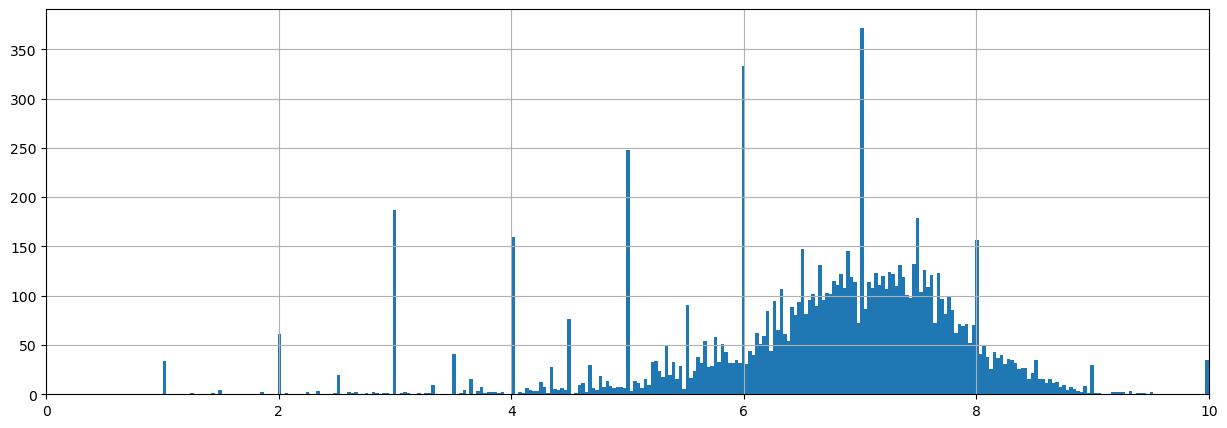

In [43]:
plt.figure(figsize=(15,5))
anime['rating_y'].hist(bins=300)
plt.xlim(0,10)

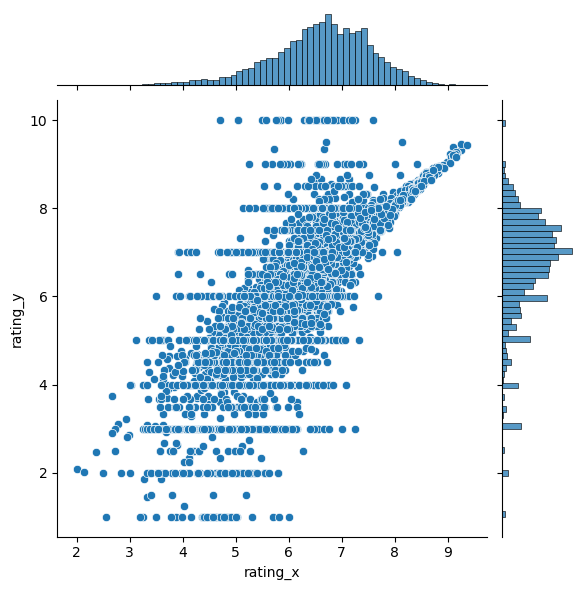

In [44]:
sns.jointplot(x='rating_x',y='rating_y',data=anime)

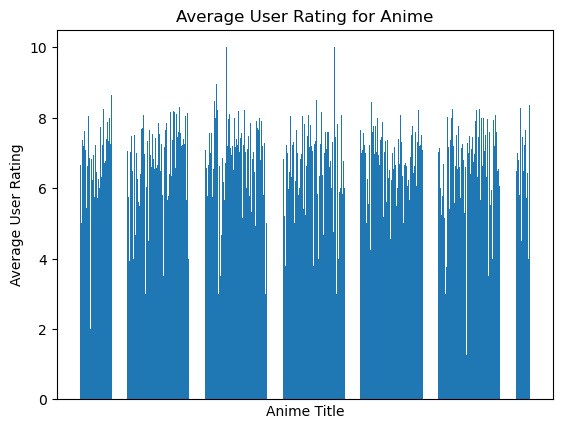

In [45]:
data = anime
  # Subset the DataFrame to include only TV anime
ratings_y = data.groupby('name')['rating_y'].mean()  # Group the TV anime by name and calculate the average user rating for each anime

plt.bar(ratings_y.index, ratings_y.values)  # Create a bar chart with the anime names on the x-axis and the average user rating on the y-axis
plt.xticks([])
plt.title('Average User Rating for Anime')  # Set the chart title
plt.xlabel('Anime Title')  # Set the x-axis label
plt.ylabel('Average User Rating')  # Set the y-axis label
plt.show()  # Display the chart

In [46]:
data = anime
ratings_x = data.groupby('name')['rating_x'].mean()  # Group the TV anime by name and calculate the average user rating for each anime
plt.bar(ratings_x.index, ratings_x.values)  # Create a bar chart with the anime names on the x-axis and the average user rating on the y-axis
plt.xticks([])
plt.title('Average OverAll Rating for Anime')  # Set the chart title
plt.xlabel('Anime Title')  # Set the x-axis label
plt.ylabel('Average OverAll Rating')  # Set the y-axis label
plt.show()  # Display the chart

In [ ]:
# Select columns for x and y
x = anime['rating_y']
y = anime['rating_x']

# Plot scatter plot
plt.scatter(x, y, c=anime['anime_id'])
plt.title('Overall Rating vs User Rating Scatter Plot')
plt.xlabel('User Rating')
plt.ylabel('Overall Rating')
plt.show()

In [ ]:
# Define the range of column indexes to plot
start_col = 8
end_col = 88

# Compute the sum of values for each column and sort in decreasing order
sums = anime.iloc[:, start_col:end_col].sum().sort_values(ascending=False)

# Define a color palette
colors = ['royalblue', 'cornflowerblue', 'skyblue', 'mediumaquamarine', 'seagreen', 'darkkhaki', 
          'orange', 'salmon', 'indianred', 'palevioletred', 'mediumorchid', 'darkviolet']

# Plot the histogram
plt.figure(figsize=(30, 10))
plt.bar(sums.index, sums.values, width=0.5, alpha=0.8, color=colors)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Sum of values', fontsize=14)
plt.title('Sum of values for anime genres', fontsize=16)
plt.tight_layout()
plt.show()

Hot Encoding the column 'Type' in the Anime Dataset.

In [ ]:
# Apply one-hot encoding on the 'type' column
one_hot_type = pd.get_dummies(anime['type'])

# Concatenate the one-hot encoded column to the original dataframe
anime_final = pd.concat([anime, one_hot_type], axis=1)

# Drop the original 'type' column
anime_final.drop('type', axis=1, inplace=True)

# Print the updated dataframe
anime_final.head()


In [ ]:
'''
    # Define the range of column indexes to plot
    start_col = 88
    end_col = 94

    # Compute the sum of values for each column and sort in decreasing order
    sums = anime_final.iloc[:, start_col:end_col].sum().sort_values(ascending=False)

    # Define a color palette
    colors = ['royalblue', 'cornflowerblue', 'skyblue', 'mediumaquamarine', 'seagreen', 'darkkhaki', 
            'orange', 'salmon', 'indianred', 'palevioletred', 'mediumorchid', 'darkviolet']

    # Plot the histogram
    plt.figure(figsize=(10, 10))
    plt.bar(sums.index, sums.values, width=0.5, alpha=0.8, color=colors)
    plt.xticks(rotation=90, fontsize=12)
    plt.xlabel('Genres', fontsize=14)
    plt.ylabel('Sum of values', fontsize=14)
    plt.title('Sum of values for anime genres', fontsize=16)
    plt.tight_layout()
    plt.show()
'''
# Create the pie chart
cols_pie = anime_final.iloc[:, 88:95].sum()
fig = plt.figure(facecolor='white',figsize=(15, 15))
ax2 = fig.add_subplot(122)
ax2.pie(cols_pie.values, labels=cols_pie.index, autopct='%1.1f%%',)
ax2.set_title('Pie Chart on Anime Type ')
# Set custom legend
labels = ['TV', 'Movie', 'Original Video Animation', 'Original Net Animation', 'Special', 'Music']
handles = [plt.Rectangle((0,0),1,1, color='C{}'.format(i)) for i in range(len(labels))]
ax2.legend(handles, labels, loc='center', bbox_to_anchor=(1.2, 0.5))

Saving the Final Dataset File.

In [ ]:
# anime_final.to_csv('anime_final.csv', index=False)
anime_final.shape